# Clusterização para Segmentação de Clientes

## 🎯 Objetivo da Aula
Aprender a usar técnicas de **clusterização** para agrupar clientes (ou produtos) com base em seu comportamento.
Vamos explorar duas abordagens: **K-Means** (mais comum) e **DBSCAN** (mais robusto).

## 🧠 O que é Clusterização?
Clusterização é uma técnica de **aprendizado não supervisionado** usada para **identificar padrões e grupos** em dados sem usar rótulos prévios.

**Exemplo:** agrupar clientes com base em:
- valor de compras
- frequência de compra
- canais preferidos
- tempo de resposta a campanhas

O objetivo é **criar segmentos úteis** para ações de marketing, retenção, personalização etc.

## 🧪 Criando um exemplo de base de clientes

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


# Gerar base com 5 clusters distintos e bem separados
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1, random_state=42)

# Transformar em DataFrame com nomes desejados
clientes = pd.DataFrame(X, columns=['Frequencia_Compra', 'Valor_Medio'])

## 📊 Visualizando os dados

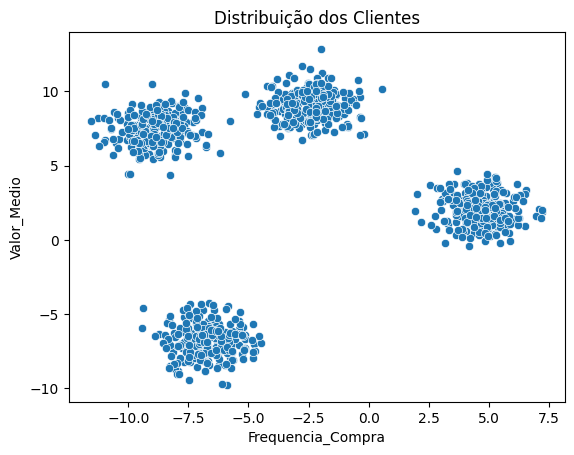

In [28]:
sns.scatterplot(data=clientes, x='Frequencia_Compra', y='Valor_Medio')
plt.title('Distribuição dos Clientes')
plt.show()

## 🔧 Padronizando os dados (pré-processamento)

In [29]:
scaler = StandardScaler()
dados_norm = scaler.fit_transform(clientes)

## 📍 Aplicando K-Means

In [18]:
clientes

,Frequencia_Compra,Valor_Medio,Cluster_KMeans
0,-8.271752,6.805713,3
1,-5.395436,-6.281524,1
2,-5.762973,-6.728099,1
3,3.721157,0.273481,2
4,4.120696,-1.033116,2
...,...,...,...
995,-2.756620,-4.463377,1
996,-1.260958,10.270977,4
997,2.741081,7.237934,2
998,-8.098652,-7.254052,1


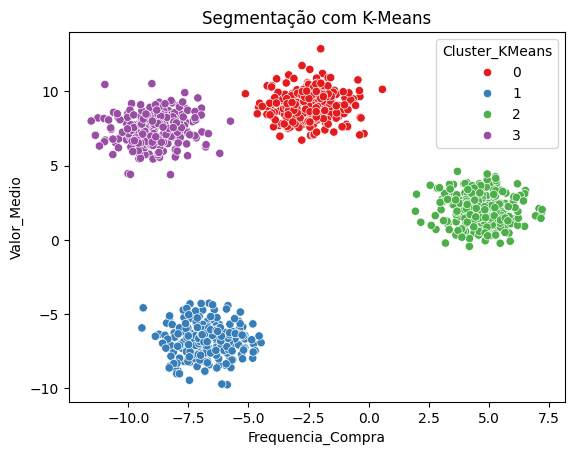

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
clientes['Cluster_KMeans'] = kmeans.fit_predict(dados_norm)
sns.scatterplot(data=clientes, x='Frequencia_Compra', y='Valor_Medio', hue='Cluster_KMeans', palette='Set1')
plt.title('Segmentação com K-Means')
plt.show()

### 🧠 Interpretação:
- Cada ponto representa um cliente.
- Cores diferentes indicam grupos com comportamento parecido.
- O K-Means **agrupa pela distância média até os centróides**.

## 🧮 Avaliando a qualidade dos clusters

O que é o silhouette_score?

O Silhouette Score é uma métrica para avaliar a qualidade de agrupamentos (clusters), como os produzidos por algoritmos como o K-Means.

Ele mede o quão bem cada ponto está dentro do seu cluster comparado com os outros clusters.

| Valor do Score     | Interpretação                                                                            |
| ------------------ | ---------------------------------------------------------------------------------------- |
| **Próximo de 1.0** | Ótimo agrupamento. Pontos estão bem separados entre si.                                  |
| **Cerca de 0.5**   | Agrupamento razoável. Há alguma sobreposição entre grupos.                               |
| **Perto de 0.0**   | Fraco agrupamento. Pontos estão muito próximos de bordas.                                |
| **Negativo (< 0)** | Problema no agrupamento. Pontos estão mais perto de outro cluster do que do seu próprio. |


In [36]:
silhouette = silhouette_score(dados_norm, clientes['Cluster_KMeans'])
print(f'Silhouette Score: {silhouette:.2f}')

Silhouette Score: 0.80


### Testando K

In [32]:
# Lista para armazenar os resultados
silhouette_scores = []
k_values = range(2, 11)

In [33]:
# Calculando o Silhouette Score para diferentes valores de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(dados_norm)
    score = silhouette_score(dados_norm, labels)
    silhouette_scores.append(score)

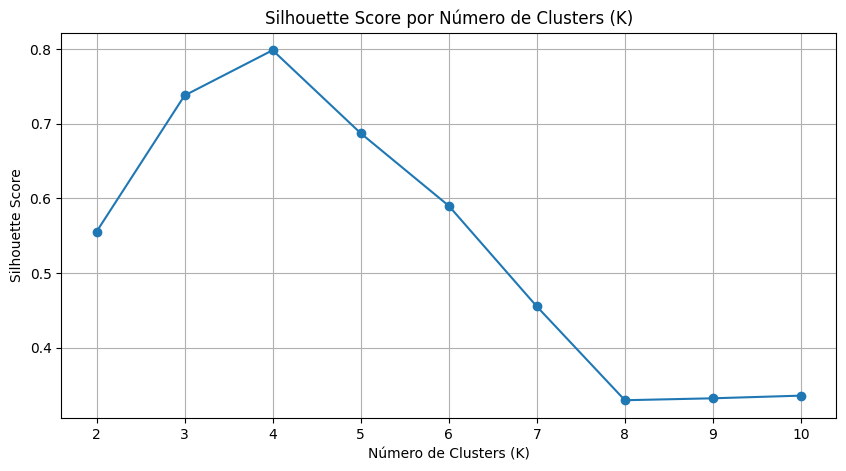

In [34]:
# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xticks(k_values)
plt.title('Silhouette Score por Número de Clusters (K)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## 📌 Alternativa: DBSCAN (robusto a outliers e forma dos grupos)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clusterização baseado em densidade.

Ele não exige que você defina o número de clusters. Em vez disso, forma grupos com base na proximidade e densidade dos pontos

####🔧 Parâmetros principais

**eps=0.8**

Distância máxima entre dois pontos para serem considerados vizinhos.

Quanto maior o eps, maior a área que o DBSCAN considera como "vizinha".

> Dica: valores muito grandes unem tudo num único cluster; valores muito pequenos geram muitos ruídos.

**min_samples=5**

Número mínimo de pontos dentro da região de eps para um ponto ser considerado um núcleo (core point) de um cluster.

Se um ponto tiver menos de 5 vizinhos dentro de um raio de 0.8, ele pode ser:

fronteira (vizinho de um núcleo)

ruído (isolado, marcado como -1)

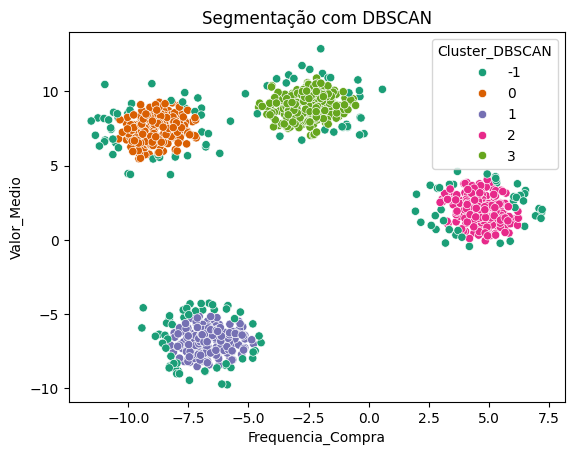

In [47]:
dbscan = DBSCAN(eps=0.09, min_samples=12)
clientes['Cluster_DBSCAN'] = dbscan.fit_predict(dados_norm)
sns.scatterplot(data=clientes, x='Frequencia_Compra', y='Valor_Medio', hue='Cluster_DBSCAN', palette='Dark2')
plt.title('Segmentação com DBSCAN')
plt.show()

Clusters são coloridos diferentes. O ruído (clientes isolados que não se encaixaram em nenhum grupo) geralmente aparece como cor neutra ou -1.

### Testando eps

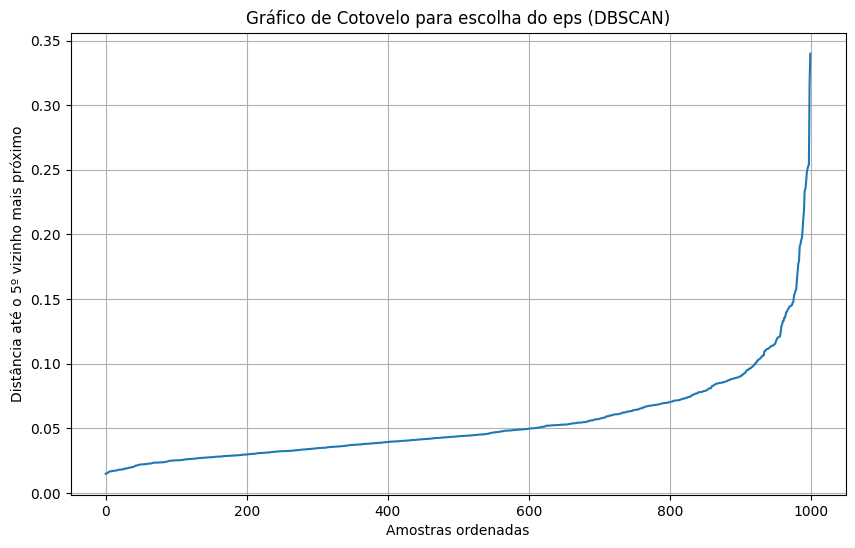

In [40]:
from sklearn.neighbors import NearestNeighbors

# Passo 1: Gerar o gráfico da distância dos k vizinhos mais próximos
k = 5
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = nearest_neighbors.fit(dados_norm)
distances, indices = neighbors_fit.kneighbors(dados_norm)

# Ordenar distâncias para visualizar o cotovelo
distances = np.sort(distances[:, k-1])

# Plot do gráfico de cotovelo para escolher o melhor eps
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Gráfico de Cotovelo para escolha do eps (DBSCAN)')
plt.xlabel('Amostras ordenadas')
plt.ylabel(f'Distância até o {k}º vizinho mais próximo')
plt.grid(True)
plt.show()

O ponto onde ocorre uma mudança brusca na inclinação (o "cotovelo") sugere um bom valor de eps.

## ✅ Comparando K-Means vs DBSCAN
- **K-Means** assume que os grupos são arredondados (esféricos) e exige saber **quantos clusters** queremos.
- **DBSCAN** é melhor para **formatos irregulares** e **detecta outliers** como ruído (label = -1).
- Ambos são úteis dependendo do seu objetivo e da natureza dos dados.

## 🧾 Conclusão
- Clusterização é uma ferramenta essencial para entender diferentes perfis de clientes.
- Ajuda a personalizar estratégias e ações.
- K-Means é mais simples e rápido, mas DBSCAN é mais flexível e robusto a ruído.

➡️ Use sempre uma visualização e uma métrica (como Silhouette) para validar a qualidade dos seus grupos!